### Multi-armed bandits with upper-confidence-bound action selection

The exercise is the same as in Exercise mab/eps, but now
actions are selected according to

𝐴𝑡 ∶= arg max_𝑎 (𝑄𝑡(𝑎) + 𝑐√[ (ln 𝑡) / 𝑁𝑡(𝑎)]).

Which value of 𝑐 yields the largest return or average reward?

In [1]:
using Statistics
using Plots

In [2]:
function mab(q, c; epochs=1000)
    num_bandits = length(q)
    Q = zeros(num_bandits)
    N = zeros(num_bandits)
    rewards = []
    actions = []
    
    for t in 1:epochs
        if min(N...) == 0
            a = findmin(N)[2]
        else
            a = findmax(Q + c*sqrt.(log(t) ./ N))[2]
        end
        
        R = q[a] .+ randn()
        push!(rewards, R)
        push!(actions, a)
        N[a] += 1
        Q[a] += (R - Q[a])/N[a]
    end
    
    return rewards, actions, Q
end

mab (generic function with 1 method)

In [3]:
reward_dict = Dict()

N = 10
num_runs = 1000

for c in [1/16, 1/8, 1/4, 1/2, 1, 2, 4]
    mean_rewards = []
    for run in 1:num_runs
        q = randn(N)
        push!(mean_rewards, mean(mab(q, c, epochs=1000)[1]))
    end
    
    reward_dict[c] = mean_rewards 
end

In [4]:
reward_std = Dict(c => std(reward_dict[c]) for c in keys(reward_dict))
reward_mean = Dict(c => mean(reward_dict[c]) for c in keys(reward_dict))

Dict{Float64,Float64} with 7 entries:
  0.125  => 1.437
  4.0    => 1.1779
  0.0625 => 1.42395
  0.5    => 1.46799
  2.0    => 1.40097
  0.25   => 1.45556
  1.0    => 1.46536

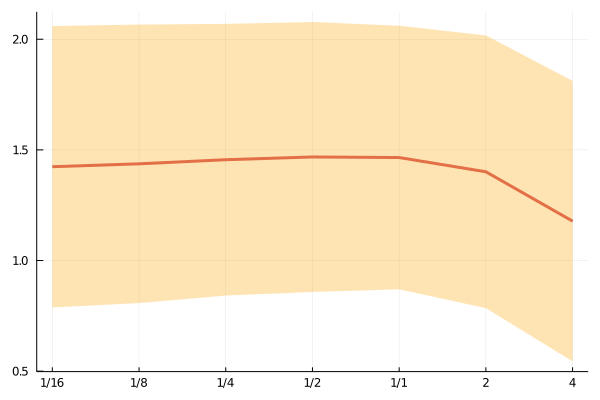

In [5]:
x = [1/16, 1/8, 1/4, 1/2, 1, 2, 4]
y_mean = [reward_mean[k] for k in x]
y_std = [reward_std[k] for k in x]

x_tics = append!(["1/$(num)" for num in [16, 8, 4, 2, 1]], ["$(num)" for num in [2, 4]])
plot(x, y_mean, xtick=(x, x_tics), xaxis=:log, legend=false)
plot!(x, y_mean, ribbon=y_std, fc=:orange, fa=0.3, linewidth=3)

In [6]:
action_dict = Dict()

N = 10
num_runs = 1000
epochs = 1000

for c in [1/16, 1/8, 1/4, 1/2, 1, 2, 4]
    correct_action_count = []
    for run in 1:num_runs
        q = randn(N)
        optimal_action = findmax(q)[2]
        
        actions = mab(q, c, epochs=1000)[2]
        correct_actions = length(filter(x -> x==optimal_action, actions))/epochs
        push!(correct_action_count, correct_actions)
    end
    
    action_dict[c] = correct_action_count 
end

In [7]:
action_count_std = Dict(c => std(action_dict[c]) for c in keys(action_dict))
action_count_means = Dict(c => mean(action_dict[c]) for c in keys(action_dict))

Dict{Float64,Float64} with 7 entries:
  0.125  => 0.71407
  4.0    => 0.560124
  0.0625 => 0.694003
  0.5    => 0.815651
  2.0    => 0.750053
  0.25   => 0.755076
  1.0    => 0.861968

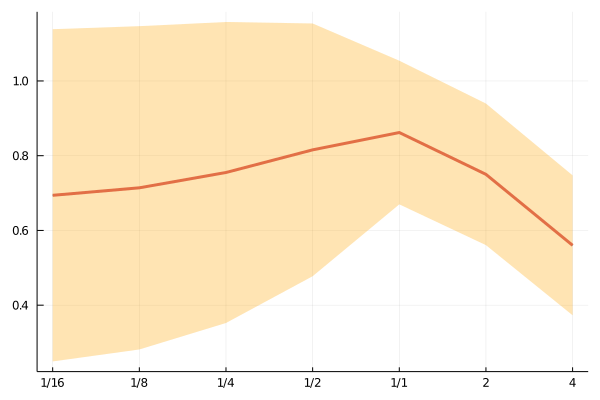

In [8]:
x = [1/16, 1/8, 1/4, 1/2, 1, 2, 4]
y_mean = [action_count_means[k] for k in x]
y_std = [action_count_std[k] for k in x]

x_tics = append!(["1/$(num)" for num in [16, 8, 4, 2, 1]], ["$(num)" for num in [2, 4]])
plot(x, y_mean, xtick=(x, x_tics), xaxis=:log, legend=false)
plot!(x, y_mean, ribbon=y_std, fc=:orange, fa=0.3, linewidth=3)